<a href="https://colab.research.google.com/github/Yadidya5/interannual-variability-IT-Andaman-Sea/blob/main/ORAS_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import xgcm as xg
#========================================================
import sys
sys.path.append('py_scripts')
import yadi
#========================================================

# **ORAS5 data analysis (BVF)**

Read input data

In [ ]:
f1 = xr.open_mfdataset("H:/ORAS_indianocean/*_oras_temp_indian_ocean.nc")
f2 = xr.open_mfdataset("H:/ORAS_indianocean/*_oras_salt_indian_ocean.nc")


In [ ]:
s1 = f2.so[:,:31,:,:].sel(longitude=slice(88,100),latitude=slice(3,18))
t1 = f1.thetao[:,:31,:,:].sel(longitude=slice(88,100),latitude=slice(3,18))
p1 = f1.depth[:31]

In [ ]:
n2 = bvf(s1,t1,p1,"depth").compute()
n1 = n2.max("depth")

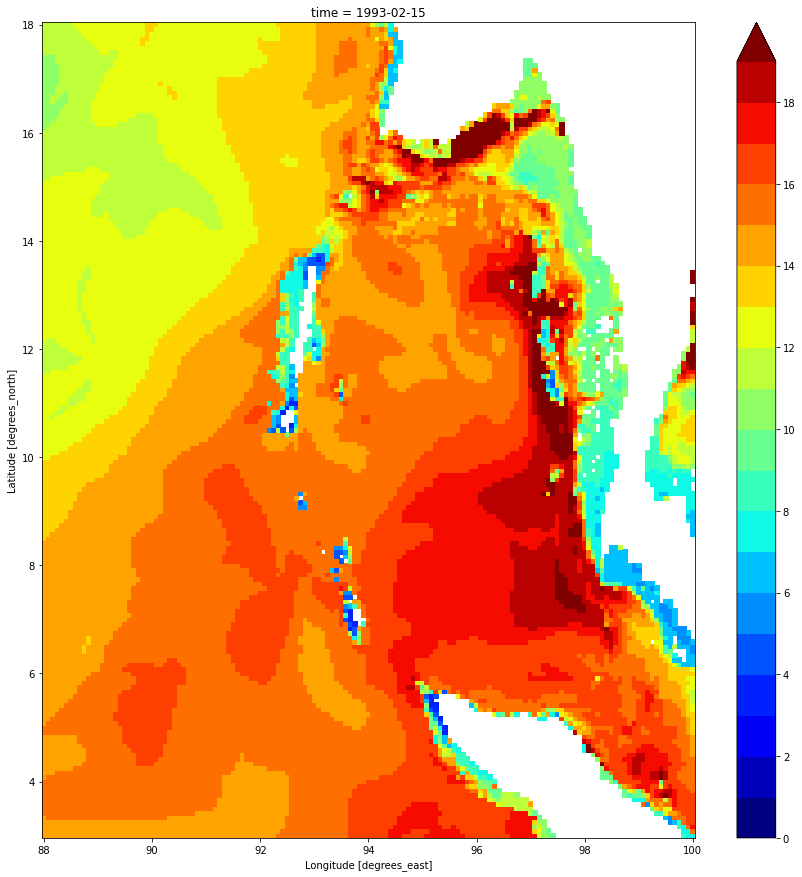

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
n1[1,:,:].plot(ax=ax,levels=np.arange(20),cmap='jet')
#.sel(longitude=93,method='nearest')
ax.set_aspect("equal")

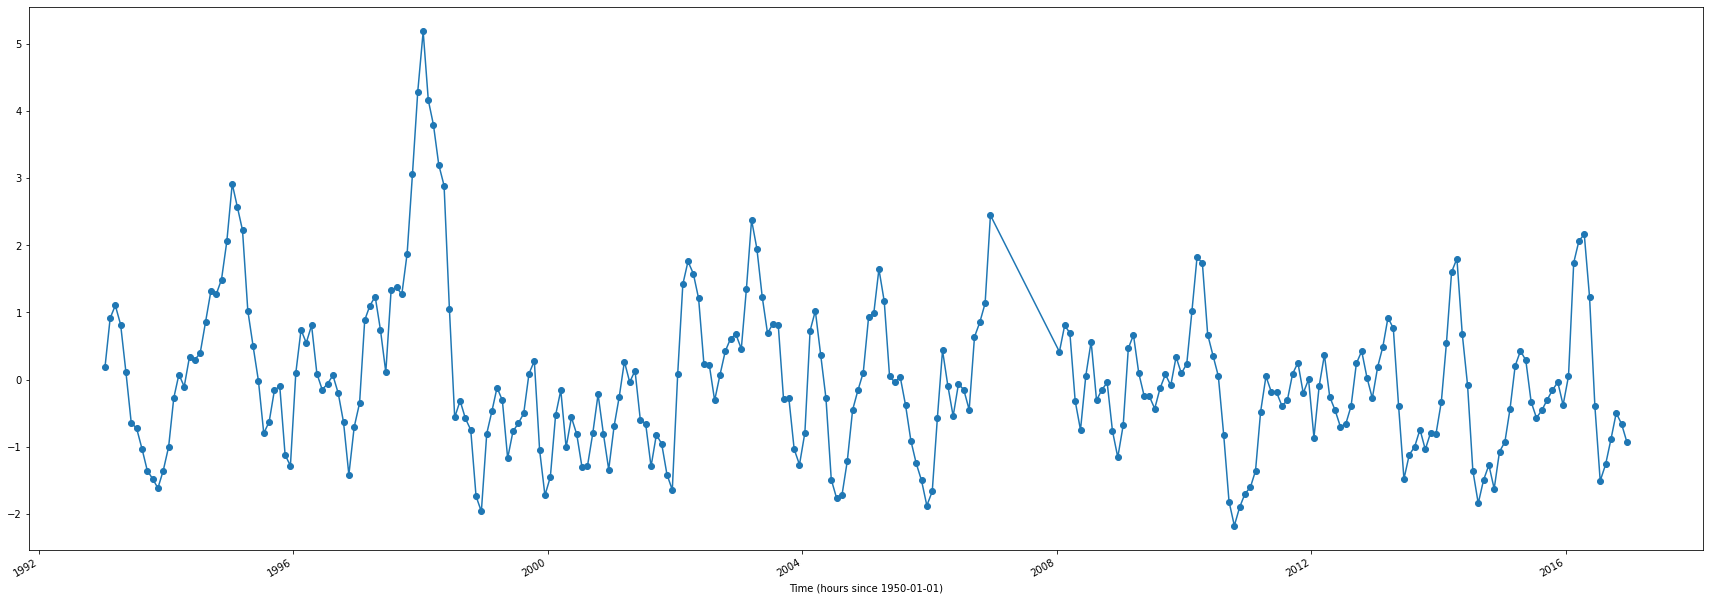

In [ ]:
n3 = n1.sel(longitude=slice(91,95),latitude=slice(8,11)).mean("longitude").mean("latitude")
#n3 = n3.mean("latitude")
anom = n3 - n3.mean()
fig, ax = plt.subplots(figsize=(30,10))
#n3.plot(marker='*')
anom.plot(marker='o')

In [ ]:
anom[150:200]

<xarray.DataArray (time: 50)>
array([ 0.0415411 , -0.3845091 , -0.91098213, -1.2478437 , -1.5026941 ,
       -1.8758345 , -1.6661682 , -0.5717001 ,  0.43450165, -0.09033108,
       -0.545104  , -0.06544399, -0.15209389, -0.44994068,  0.6347027 ,
        0.85201836,  1.1346712 ,  2.445548  ,  0.41330814,  0.8047428 ,
        0.6930847 , -0.31971073, -0.7496872 ,  0.05583858,  0.56428623,
       -0.3067255 , -0.15424442, -0.04263783, -0.7654314 , -1.1573315 ,
       -0.6810188 ,  0.4655409 ,  0.66268253,  0.09416008, -0.23970222,
       -0.25232506, -0.43289375, -0.12681389,  0.07676029, -0.08847046,
        0.33549023,  0.09158134,  0.23504448,  1.0152779 ,  1.8234777 ,
        1.7325258 ,  0.67024803,  0.35723782,  0.05287743, -0.8256445 ],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2005-07-16T12:00:00 ... 2010-08-16T12:00:00

In [ ]:
grid = xg.Grid(hans,periodic=['Z'])
grid

<xgcm.Grid>
Z Axis (periodic, boundary=None):
  * center   depth
T Axis (not periodic, boundary=None):
  * center   time

In [ ]:
print(hans[0,:].differentiate("depth"))
print(hans[0,:])


<xarray.DataArray (depth: 30)>
array([0.02424273, 0.02328491, 0.01895142, 0.01422119, 0.01223755,
       0.01138306, 0.01074219, 0.01055908, 0.01156616, 0.01316833,
       0.01654053, 0.02160645, 0.026474  , 0.03112793, 0.03424835,
       0.03549957, 0.03604126, 0.03384399, 0.02842712, 0.02228546,
       0.01747131, 0.01472664, 0.01387978, 0.0144043 , 0.01488781,
       0.01375484, 0.01187229, 0.00971317, 0.0074029 , 0.00638019],
      dtype=float32)
Coordinates:
  * depth      (depth) float32 0.494 1.541 2.646 3.819 ... 266.0 318.1 380.2
    latitude   float32 -24.17
    time       datetime64[ns] 1993-01-16T12:00:00
    longitude  float32 53.33
<xarray.DataArray (depth: 30)>
array([1022.9436 , 1022.969  , 1022.9935 , 1023.01166, 1023.02783,
       1023.0436 , 1023.06036, 1023.0771 , 1023.09717, 1023.1224 ,
       1023.1557 , 1023.2072 , 1023.2828 , 1023.3874 , 1023.52997,
       1023.7043 , 1023.918  , 1024.1704 , 1024.4337 , 1024.6836 ,
       1024.9147 , 1025.1378 , 1025.3798 , 1025

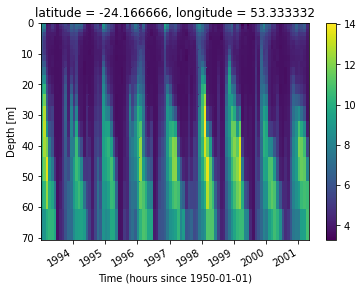

In [ ]:
rho1 = hans.differentiate("depth")
g = -9.8
rho0 = hans.mean()
bvfr2 = (g/rho0)*rho1

n2 = (np.sqrt(np.abs(bvfr2))) * 60.0 * 60.0 / (2.0 * np.pi)
n2[:,0:20].plot(yincrease=False,y='depth')

# **BD12 Data Analysis**

In [2]:
bd12 = xr.open_dataset("data/BD12profiledata/bd12_tsuv_mar2012_jul2019.nc")
bd12

<xarray.Dataset>
Dimensions:  (dep1: 11, dep2: 42, time: 64941)
Coordinates:
  * dep1     (dep1) int64 1 5 10 15 20 30 50 75 100 200 500
  * dep2     (dep2) int64 1 10 15 20 25 30 35 40 ... 180 185 190 195 200 205 210
  * time     (time) datetime64[ns] 2012-03-01 ... 2019-07-28T20:00:00
Data variables:
    temp     (time, dep1) float64 ...
    salt     (time, dep1) float64 ...
    uvel     (time, dep2) float64 ...
    vvel     (time, dep2) float64 ...
Attributes:
    Date created:  12-Nov-2020

Compute density and BVF at BD12


In [12]:
bd_dens = dens(bd12.salt,bd12.temp,bd12.dep1)
bd_bvf = bvf(bd12.salt,bd12.temp,bd12.dep1,"dep1")
#.interpolate_na("dep1",method="linear", fill_value="extrapolate")
bd_dens.attrs["Description"]="Density from BD12 observations"
bd_bvf.attrs["Description"]="BVF from BD12 observations"

Resample to seasonal averages

<AxesSubplot:xlabel='time'>

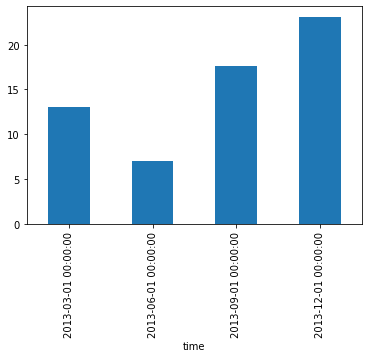

In [53]:
bvf_seas = bd_bvf.resample(time="QS-DEC").mean()
#bvf_seas[:,7].plot.bar()
n = 2
bvf_seas[:4,n].to_series().plot.bar()
bvf_seas[4:8,n].to_series().plot.bar()


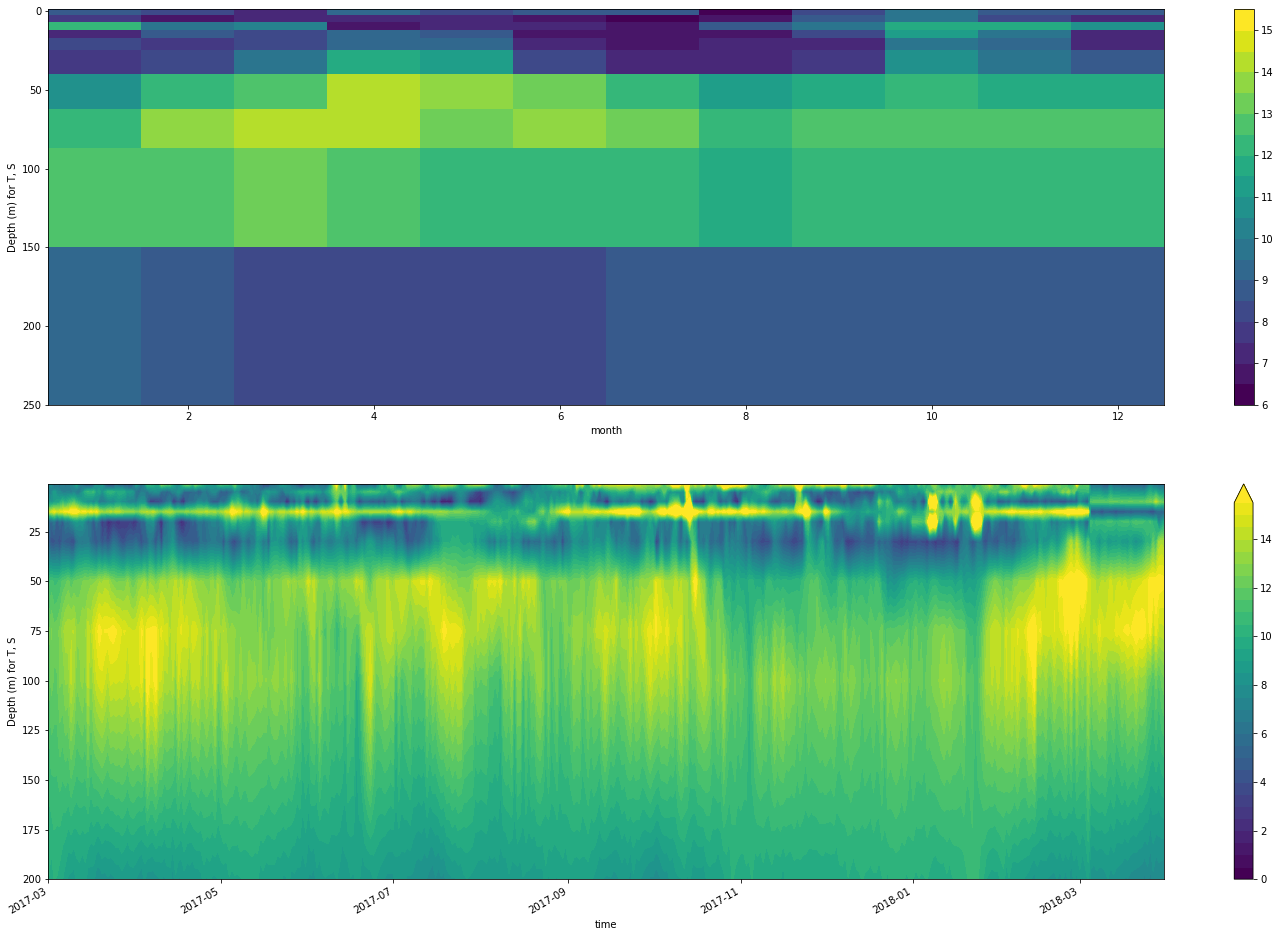

In [92]:
fig, (ax0,ax1) = plt.subplots(2,1,figsize=(25,16))

bd_bvf[:,:10].groupby("time.month").mean("time").plot(ax=ax0,y='dep1',yincrease=False,levels=np.arange(6,16,0.5))
bd_bvf[:,:10].sel(time=slice("2017,01,03","2018,01,03")).resample(time="1D").mean().plot.contourf(ax=ax1,y='dep1',yincrease=False,levels=np.arange(0,16,0.5))

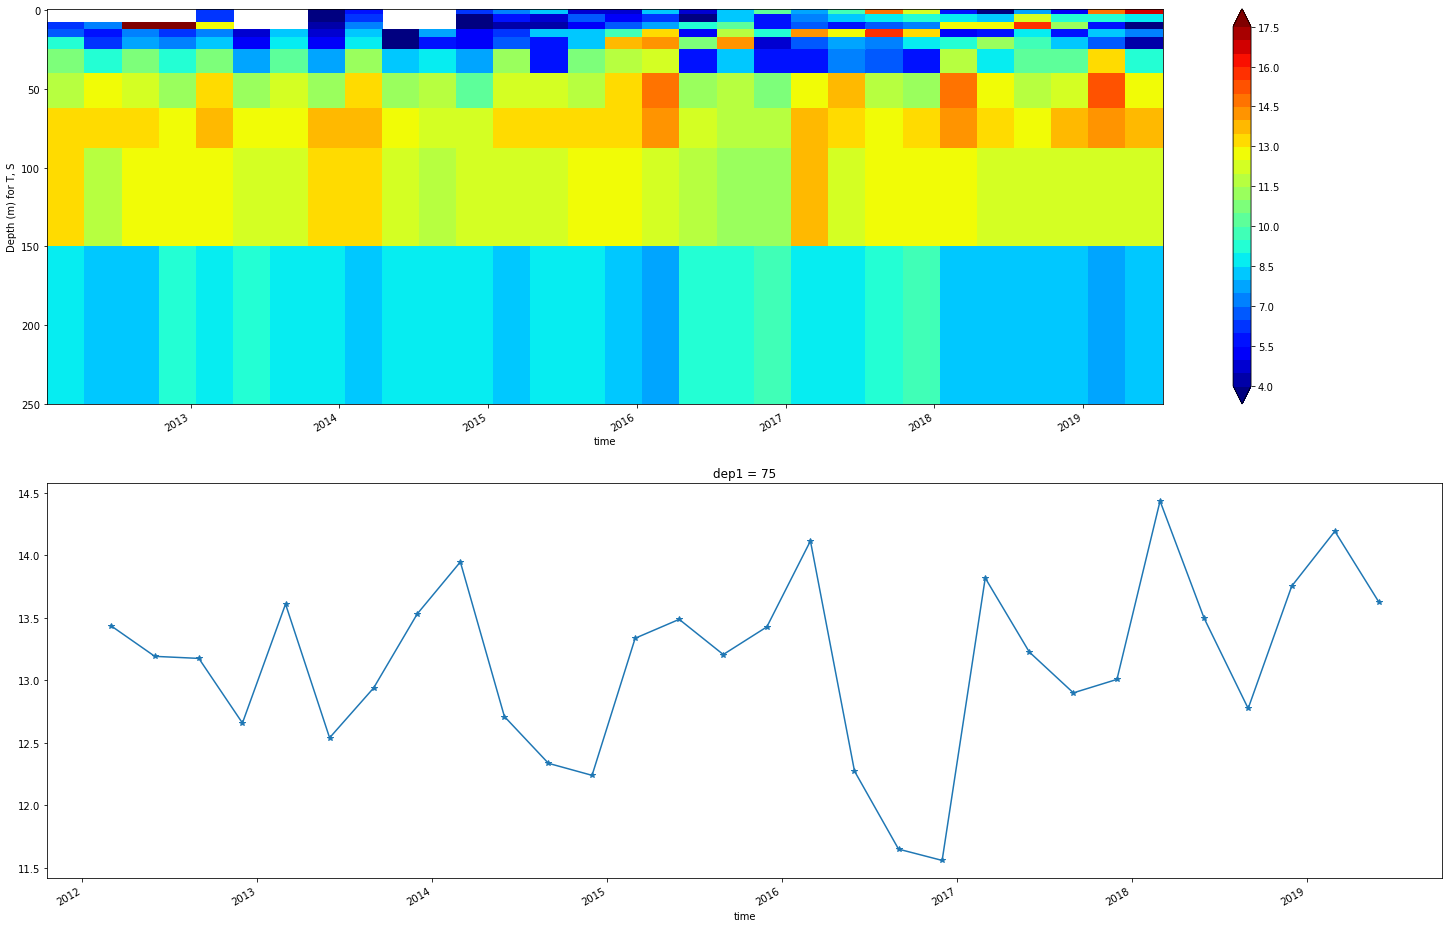

In [54]:
fig, (ax0,ax1) = plt.subplots(2,1,figsize=(25,16))
bvf_seas[:,:10].plot(ax=ax0,y='dep1',yincrease=False,levels=np.arange(4,18,0.5),cmap='jet')
bvf_seas[:,7].plot(ax=ax1,marker='*')


Plotting

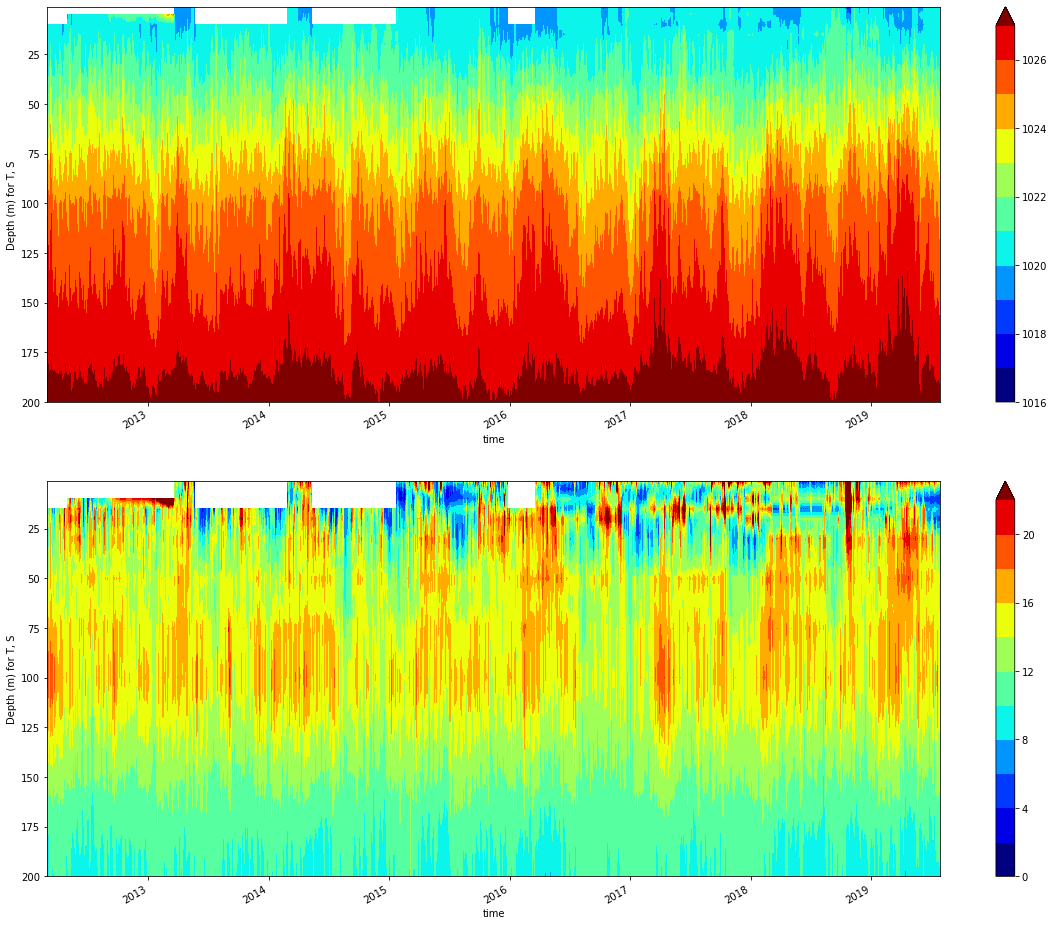

In [13]:
fig, (ax0,ax1) = plt.subplots(2,1,figsize=(20,16))
bd_dens[:,:10].plot.contourf(ax=ax0,y='dep1',yincrease=False,levels=np.arange(1016,1028,1),cmap='jet')
bd_bvf[:,:10].plot.contourf(ax=ax1,y='dep1',yincrease=False,levels=np.arange(0,24,2),cmap='jet')

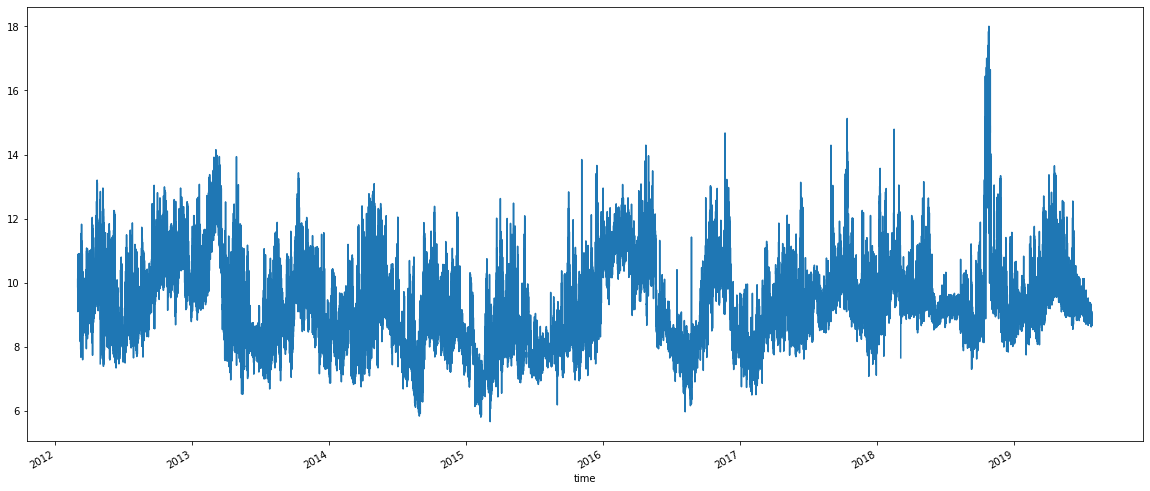

In [ ]:
fig,ax = plt.subplots(figsize=(20,8))
#bd_bvf[:,:5].mean('dep1').plot()
bd_bvf[:,:11].mean('dep1').plot()


# **Functions to compute buoyancy frequency**

In [3]:

def dens0(s,t):
    T68 = t * 1.0024
    # UNESCO 1983 Eqn.(13) p17.
    b = (8.24493e-1, -4.0899e-3, 7.6438e-5, -8.2467e-7, 5.3875e-9)
    c = (-5.72466e-3, 1.0227e-4, -1.6546e-6)
    d = 4.8314e-4
    return (smow(t) + (b[0] + (b[1] + (b[2] + (b[3] + b[4] * T68) * T68) *
            T68) * T68) * s + (c[0] + (c[1] + c[2] * T68) * T68) * s *
            s ** 0.5 + d * s ** 2)
def smow(t):
  """
    Density of Standard Mean Ocean Water (Pure Water) using EOS 1980.
  """
  a = (999.842594, 6.793952e-2, -9.095290e-3, 1.001685e-4, -1.120083e-6,
         6.536332e-9)

  T68 = t * 1.0024
  return (a[0] + (a[1] + (a[2] + (a[3] + (a[4] + a[5] * T68) * T68) * T68) *
            T68) * T68)

def seck(s,t,p):
  """
    Secant Bulk Modulus (K) of Sea Water using Equation of state 1980.
    UNESCO polynomial implementation.
  """
  # Compute compression terms.
  p = p / 10.0  # Convert from db to atmospheric pressure units.
  T68 = t * 1.0024

    # Pure water terms of the secant bulk modulus at atmos pressure.
    # UNESCO Eqn 19 p 18.
    # h0 = -0.1194975
  h = [3.239908, 1.43713e-3, 1.16092e-4, -5.77905e-7]
  AW = h[0] + (h[1] + (h[2] + h[3] * T68) * T68) * T68

    # k0 = 3.47718e-5
  k = [8.50935e-5, -6.12293e-6, 5.2787e-8]
  BW = k[0] + (k[1] + k[2] * T68) * T68

    # e0 = -1930.06
  e = [19652.21, 148.4206, -2.327105, 1.360477e-2, -5.155288e-5]
  KW = e[0] + (e[1] + (e[2] + (e[3] + e[4] * T68) * T68) * T68) * T68

    # Sea water terms of secant bulk modulus at atmos. pressure.
  j0 = 1.91075e-4
  i = [2.2838e-3, -1.0981e-5, -1.6078e-6]
  A = AW + (i[0] + (i[1] + i[2] * T68) * T68 + j0 * s ** 0.5) * s

  m = [-9.9348e-7, 2.0816e-8, 9.1697e-10]
  B = BW + (m[0] + (m[1] + m[2] * T68) * T68) * s  # Eqn 18.

  f = [54.6746, -0.603459, 1.09987e-2, -6.1670e-5]
  g = [7.944e-2, 1.6483e-2, -5.3009e-4]
  K0 = (KW + (f[0] + (f[1] + (f[2] + f[3] * T68) * T68) * T68 +
                (g[0] + (g[1] + g[2] * T68) * T68) * s ** 0.5) * s)  # Eqn 16.
  return K0 + (A + B * p) * p  # Eqn 15.

def dens(s,t,p):
  """
    Density of Sea Water using UNESCO 1983 (EOS 80) polynomial.
  """
  # UNESCO 1983. Eqn..7  p.15.
  densP0 = dens0(s, t)
  K = seck(s, t, p)
  p = p / 10.  # Convert from db to atm pressure units.
  return densP0 / (1 - p / K)

def bvf(s,t,p,zdim="depth"):
  den = dens(s,t,p)
  rhod = den.differentiate(zdim)
  g = 9.8
  rho0 = den.mean()
  bvfr2 = (g/rho0)*rhod
  n2 = (np.sqrt(np.abs(bvfr2))) * 60.0 * 60.0 / (2.0 * np.pi)
  return n2